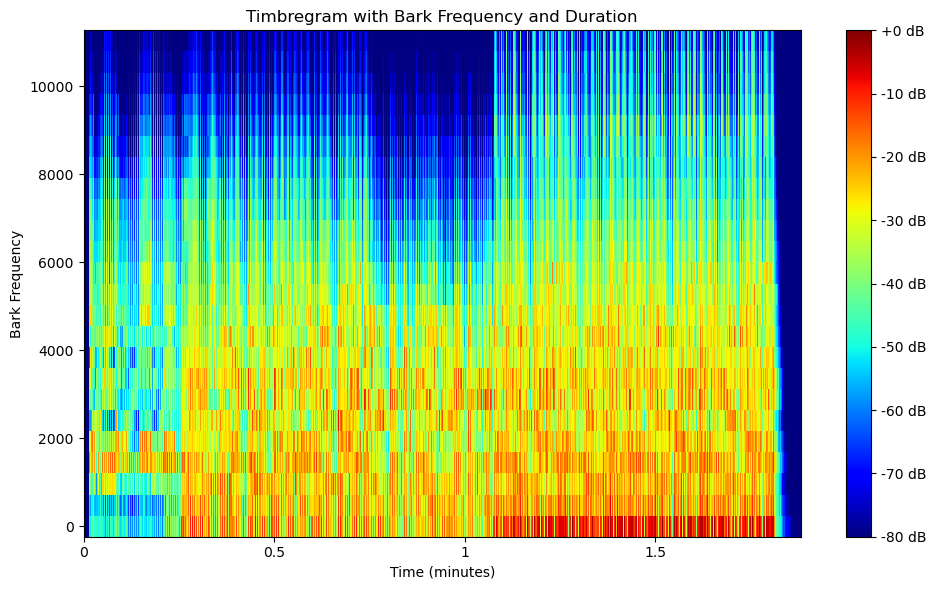

In [31]:
# Import necessary libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
from librosa.core import resample

# Function to calculate Bark scale frequency
def hz_to_bark(frequencies):
    """
    Convert frequency in Hz to Bark scale.
    Reference: https://en.wikipedia.org/wiki/Bark_scale
    """
    return 6 * np.arcsinh(frequencies / 600)

# Load your .flac file
audio_path = "DO NOT TOUCH/Audio Files/Emmanuel/01. Vitalic.flac"  # Update with your file path
y, sr = librosa.load(audio_path, sr=None)  # Load audio file with its native sample rate

# Compute the Short-Time Fourier Transform (STFT) to get frequency and time bins
D = librosa.stft(y)

# Get the frequency bins in Hz
frequencies = librosa.fft_frequencies(sr=sr)

# Convert frequencies to Bark scale
bark_frequencies = hz_to_bark(frequencies)

# Convert the time axis to minutes
duration_in_minutes = len(y) / sr / 60.0
time_axis_in_minutes = np.linspace(0, duration_in_minutes, D.shape[1])

# Create a log-spectral representation (like a spectrogram) using the Bark frequencies
# Apply a Mel-scale filter bank (as a close approximation of Bark scale)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=24)

# Plot the spectrogram in Bark frequency (converted) over time (duration in minutes)
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='linear',
                         x_coords=time_axis_in_minutes, cmap="jet")
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Bark Frequency')
plt.xlabel('Time (minutes)')
plt.title('Timbregram with Bark Frequency and Duration')
plt.tight_layout()
plt.show()